In [1]:
import pandas as pd
import numpy as np

%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

data_path = 'C:\\Users\\mehedee\\Documents\\data\\course\\UDEMY_TSA_FINAL\\Data\\'
df1 = pd.read_csv(data_path+'airline_passengers.csv',index_col='Month',parse_dates=True)
# index_col='Date',parse_dates=True
df1.index.freq ='MS'

df2 = pd.read_csv(data_path+'DailyTotalFemaleBirths.csv',index_col='Date',parse_dates=True)
df2.index.freq = 'D'

In [2]:
from statsmodels.tsa.stattools import adfuller

def adf_test(series,title=''):
    """
    Pass in a time series and an optional title, returns an ADF report
    """
    print(f'Augmented Dickey-Fuller Test: {title}')
    result = adfuller(series.dropna(),autolag='AIC') # .dropna() handles differenced data
    
    labels = ['ADF test statistic','p-value','# lags used','# observations']
    out = pd.Series(result[0:4],index=labels)

    for key,val in result[4].items():
        out[f'critical value ({key})']=val
        
    print(out.to_string())          # .to_string() removes the line "dtype: float64"
    
    if result[1] <= 0.05:
        print("Strong evidence against the null hypothesis")
        print("Reject the null hypothesis")
        print("Data has no unit root and is stationary")
    else:
        print("Weak evidence against the null hypothesis")
        print("Fail to reject the null hypothesis")
        print("Data has a unit root and is non-stationary")

In [3]:
df = pd.read_csv(data_path+'co2_mm_mlo.csv')

In [4]:
df.head()

,year,month,decimal_date,average,interpolated
0,1958,3,1958.208,315.71,315.71
1,1958,4,1958.292,317.45,317.45
2,1958,5,1958.375,317.50,317.50
3,1958,6,1958.458,NaN,317.10
4,1958,7,1958.542,315.86,315.86


In [6]:
df['date'] = pd.to_datetime({'year':df['year'],'month':df['month'],'day':1})

In [7]:
df['date']

0     1958-03-01
1     1958-04-01
2     1958-05-01
3     1958-06-01
4     1958-07-01
         ...    
724   2018-07-01
725   2018-08-01
726   2018-09-01
727   2018-10-01
728   2018-11-01
Name: date, Length: 729, dtype: datetime64[ns]

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 729 entries, 0 to 728
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   year          729 non-null    int64         
 1   month         729 non-null    int64         
 2   decimal_date  729 non-null    float64       
 3   average       722 non-null    float64       
 4   interpolated  729 non-null    float64       
 5   date          729 non-null    datetime64[ns]
dtypes: datetime64[ns](1), float64(3), int64(2)
memory usage: 34.3 KB


In [9]:
df = df.set_index('date')

In [10]:
df.head()

,year,month,decimal_date,average,interpolated
date,,,,,
1958-03-01,1958,3,1958.208,315.71,315.71
1958-04-01,1958,4,1958.292,317.45,317.45
1958-05-01,1958,5,1958.375,317.50,317.50
1958-06-01,1958,6,1958.458,NaN,317.10
1958-07-01,1958,7,1958.542,315.86,315.86


In [12]:
df.index.freq = 'MS'

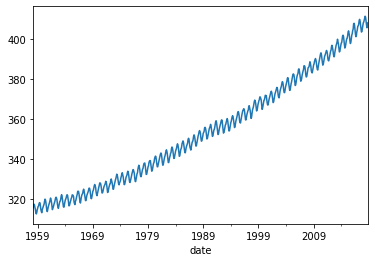

In [13]:
df['interpolated'].plot()

In [16]:
from statsmodels.tsa.seasonal import seasonal_decompose

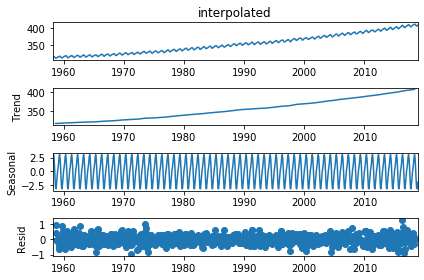

In [18]:
result = seasonal_decompose(df['interpolated'],model='add')
result.plot();

In [ ]:
auto_arima(df['interpolated'],seasonal=True,m=12)

In [20]:

train = df.iloc[:717]

In [21]:
test = df.iloc[717:]

In [22]:
import pandas as pd

In [23]:
from fbprophet import Prophet


In [26]:
df = pd.read_csv(data_path+'BeerWineLiquor.csv')

In [27]:
df.head()

,date,beer
0,1/1/1992,1509
1,2/1/1992,1541
2,3/1/1992,1597
3,4/1/1992,1675
4,5/1/1992,1822


In [28]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 324 entries, 0 to 323
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   date    324 non-null    object
 1   beer    324 non-null    int64 
dtypes: int64(1), object(1)
memory usage: 5.2+ KB


In [29]:
df.columns = ['ds','y']

In [30]:
df.head()

,ds,y
0,1/1/1992,1509
1,2/1/1992,1541
2,3/1/1992,1597
3,4/1/1992,1675
4,5/1/1992,1822


In [31]:
df['ds'] = pd.to_datetime(df['ds'])

In [32]:
df.head()

,ds,y
0,1992-01-01,1509
1,1992-02-01,1541
2,1992-03-01,1597
3,1992-04-01,1675
4,1992-05-01,1822


In [33]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 324 entries, 0 to 323
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   ds      324 non-null    datetime64[ns]
 1   y       324 non-null    int64         
dtypes: datetime64[ns](1), int64(1)
memory usage: 5.2 KB


In [35]:
m = Prophet()

m.fit(df)

INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [36]:
future = m.make_future_dataframe(periods = 24, freq = 'MS')

In [37]:
future

,ds
0,1992-01-01
1,1992-02-01
2,1992-03-01
3,1992-04-01
4,1992-05-01
...,...
343,2020-08-01
344,2020-09-01
345,2020-10-01
346,2020-11-01


In [38]:
future.tail()

,ds
343,2020-08-01
344,2020-09-01
345,2020-10-01
346,2020-11-01
347,2020-12-01


In [39]:
df.tail()

,ds,y
319,2018-08-01,4898
320,2018-09-01,4598
321,2018-10-01,4737
322,2018-11-01,5130
323,2018-12-01,6370


In [40]:
len(df)

324

In [41]:
len(future)

348

In [42]:
forecast = m.predict(future)

In [43]:
forecast

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,1992-01-01,1771.312291,1137.782032,1471.759458,1771.312291,1771.312291,-461.653037,-461.653037,-461.653037,-461.653037,-461.653037,-461.653037,0.0,0.0,0.0,1309.659254
1,1992-02-01,1774.175336,1187.475765,1510.988582,1774.175336,1774.175336,-427.115870,-427.115870,-427.115870,-427.115870,-427.115870,-427.115870,0.0,0.0,0.0,1347.059466
2,1992-03-01,1776.853668,1441.767138,1761.551559,1776.853668,1776.853668,-178.790756,-178.790756,-178.790756,-178.790756,-178.790756,-178.790756,0.0,0.0,0.0,1598.062912
3,1992-04-01,1779.716713,1419.619766,1732.485830,1779.716713,1779.716713,-196.311692,-196.311692,-196.311692,-196.311692,-196.311692,-196.311692,0.0,0.0,0.0,1583.405020
4,1992-05-01,1782.487401,1675.786512,1991.122179,1782.487401,1782.487401,44.675263,44.675263,44.675263,44.675263,44.675263,44.675263,0.0,0.0,0.0,1827.162664
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
343,2020-08-01,5200.823239,5090.044299,5405.791090,5188.161719,5211.944763,39.703050,39.703050,39.703050,39.703050,39.703050,39.703050,0.0,0.0,0.0,5240.526290
344,2020-09-01,5216.882602,4919.704313,5248.290841,5203.048379,5229.195437,-133.367528,-133.367528,-133.367528,-133.367528,-133.367528,-133.367528,0.0,0.0,0.0,5083.515075
345,2020-10-01,5232.423922,5024.790424,5361.570369,5217.560138,5245.803186,-43.400195,-43.400195,-43.400195,-43.400195,-43.400195,-43.400195,0.0,0.0,0.0,5189.023726
346,2020-11-01,5248.483285,5161.857203,5500.899169,5232.923914,5262.914545,86.835312,86.835312,86.835312,86.835312,86.835312,86.835312,0.0,0.0,0.0,5335.318596


In [133]:
datapath2 = 'C:\\Users\\mehedee\\Documents\\data\\office_projects\\product_count_prediction\\tenpo01\\poduct_sale\\' 

In [134]:
datafile = 'sale_4538151297025.csv'

In [135]:
df2 = pd.read_csv(datapath2 + datafile)

In [136]:
df2.head()

,date,count,money
0,2016/7/21,3,594
1,2016/7/22,17,3366
2,2016/7/23,199,18126
3,2016/7/24,19,3762
4,2016/7/25,14,2772


In [137]:
df2 = df2[730:]

In [138]:
df2=df2.drop('money',axis=1)

In [139]:
df2.columns = ['ds','y']

In [140]:
df2.head()

,ds,y
730,2018/7/23,26
731,2018/7/24,323
732,2018/7/25,86
733,2018/7/26,160
734,2018/7/27,7


In [141]:
df2['ds'] = pd.to_datetime(df2['ds'])

In [142]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 610 entries, 730 to 1339
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   ds      610 non-null    datetime64[ns]
 1   y       610 non-null    int64         
dtypes: datetime64[ns](1), int64(1)
memory usage: 9.7 KB


In [143]:
m = Prophet()

m.fit(df2)

INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [144]:
future = m.make_future_dataframe(periods = 60, freq = 'D')

In [145]:
future

,ds
0,2018-07-23
1,2018-07-24
2,2018-07-25
3,2018-07-26
4,2018-07-27
...,...
665,2020-06-24
666,2020-06-25
667,2020-06-26
668,2020-06-27


In [146]:
len(df2),len(future)

(610, 670)

In [147]:
forecast = m.predict(future)

In [148]:
forecast

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,weekly,weekly_lower,weekly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2018-07-23,84.972168,-32.804720,117.599609,84.972168,84.972168,-41.141619,-41.141619,-41.141619,-41.141619,-41.141619,-41.141619,0.0,0.0,0.0,43.830549
1,2018-07-24,84.937551,53.932319,210.970974,84.937551,84.937551,50.084871,50.084871,50.084871,50.084871,50.084871,50.084871,0.0,0.0,0.0,135.022422
2,2018-07-25,84.902934,-3.663332,157.437188,84.902934,84.902934,-7.007001,-7.007001,-7.007001,-7.007001,-7.007001,-7.007001,0.0,0.0,0.0,77.895933
3,2018-07-26,84.868317,-37.762229,126.078485,84.868317,84.868317,-38.338190,-38.338190,-38.338190,-38.338190,-38.338190,-38.338190,0.0,0.0,0.0,46.530127
4,2018-07-27,84.833699,-48.621981,105.508135,84.833699,84.833699,-57.417650,-57.417650,-57.417650,-57.417650,-57.417650,-57.417650,0.0,0.0,0.0,27.416050
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
665,2020-06-24,77.763453,-11.308545,150.508962,77.639249,77.883140,-7.007001,-7.007001,-7.007001,-7.007001,-7.007001,-7.007001,0.0,0.0,0.0,70.756453
666,2020-06-25,77.774041,-36.448731,120.530749,77.645949,77.898534,-38.338190,-38.338190,-38.338190,-38.338190,-38.338190,-38.338190,0.0,0.0,0.0,39.435851
667,2020-06-26,77.784628,-60.777844,94.688356,77.652729,77.914134,-57.417650,-57.417650,-57.417650,-57.417650,-57.417650,-57.417650,0.0,0.0,0.0,20.366978
668,2020-06-27,77.795215,50.775524,216.752348,77.659596,77.929354,53.517763,53.517763,53.517763,53.517763,53.517763,53.517763,0.0,0.0,0.0,131.312978


In [149]:
yy=forecast['yhat']

In [150]:
xx=forecast['ds']

In [151]:
import matplotlib.pyplot as plt
%matplotlib qt

In [152]:
plt.plot(xx,yy)

In [153]:
# m.plot(forecast)
# plt.xlim('2020-1-2','2020-4-29')

In [154]:
tt = forecast[['ds','yhat']]

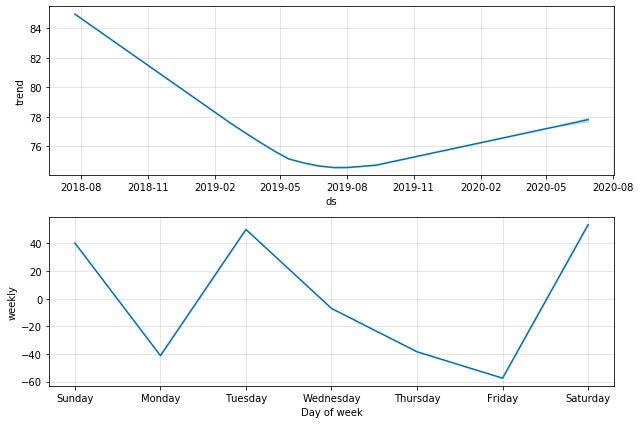

In [155]:
m.plot_components(forecast)

In [161]:
from fbprophet.diagnostics import cross_validation
df_cv = cross_validation(m, initial='7 days', period='30 days', horizon = '365 days')
df_cv.head()

INFO:fbprophet:Making 10 forecasts with cutoffs between 2018-08-03 00:00:00 and 2019-04-30 00:00:00
INFO:fbprophet:n_changepoints greater than number of observations. Using 8.


,ds,yhat,yhat_lower,yhat_upper,y,cutoff
0,2018-08-04,25.806696,-74.690900,112.244439,80,2018-08-03
1,2018-08-05,96.409612,4.966499,187.618975,61,2018-08-03
2,2018-08-06,-14.530921,-111.373755,71.221358,19,2018-08-03
3,2018-08-07,131.161087,41.401060,220.455265,233,2018-08-03
4,2018-08-08,131.155975,40.551131,215.117861,92,2018-08-03


In [162]:
from fbprophet.diagnostics import performance_metrics
df_p = performance_metrics(df_cv)
df_p.head()

INFO:fbprophet:Skipping MAPE because y close to 0


,horizon,mse,rmse,mae,mdape,coverage
0,35 days,5258.589695,72.516134,50.142698,0.557614,0.772334
1,36 days,5305.262001,72.837229,50.387827,0.559117,0.772911
2,37 days,5325.336499,72.974903,50.454058,0.557614,0.769741
3,38 days,5533.477153,74.387345,51.349645,0.559117,0.767435
4,39 days,5843.500658,76.442793,52.348583,0.584353,0.763689


In [105]:
len(df2)

1340

In [106]:
train = df2[:1000]
test = df2[1000:]

In [110]:
test.tail()

,ds,y
1335,2020-04-25,218
1336,2020-04-26,35
1337,2020-04-27,49
1338,2020-04-28,206
1339,2020-04-29,50


In [112]:
ax = forecast.plot(x='ds',y='yhat',label='Prophet',legend=True)
test.plot(x='ds',y='y',label='true vs prediction',legend=True,ax=ax,xlim=('2020-03-29','2020-05-29'))

In [113]:
prediciotns

NameError: name 'prediciotns' is not defined

In [114]:
from statsmodels.tools.eval_measures import rmse

In [121]:
predictions = forecast.iloc[-12:]['yhat']

In [122]:
predictions

1388     86.928038
1389     31.255965
1390     30.483727
1391    136.303070
1392    108.232119
1393     29.444960
1394    152.201545
1395     90.897266
1396     33.858813
1397     31.623731
1398    135.920448
1399    106.305942
Name: yhat, dtype: float64

In [128]:
len(predictions),len(test['y'])

(12, 340)

In [129]:
rmse(predictions,test['y'][:12])

54.837938028162114

In [130]:
test['y'][:12].mean()

74.25

In [132]:
plt.plot(predictions)
plt.plot(test['y'][:12])